<a href="https://colab.research.google.com/github/AdityaMohite47/pytorch-deep-learning/blob/main/Computer_Vision_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inputs & Outputs to Computer Vision Model**


[Tensor of Image properties (color channels , width & height) ] ---> [ Probability Scores for Respective Classes ]


**Libraries of PyTorch for Vision**

import torchvision

import torchvision.datasets - get datasets and data loading functions

import torchvision.models - pre-built models

import torchvision.transforms - image manipulation

**Getting Dataset**
FashionMNIST from torchvision.datasets

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [2]:
train_data = datasets.FashionMNIST(
    root="data", # location of where the data should be downloaded
    train=True, # bool value for 'traning-version of dataset'
    download=True, # bool value for 'do we want to download or load'
    transform=ToTensor(), # transforming image data to tensor
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.08MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]


In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
image , data = train_data[0]

In [5]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
data

9

In [7]:
train_data.classes # target classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
image.shape , data

(torch.Size([1, 28, 28]), 9)

**Visualizing Images**

Text(0.5, 1.0, '9')

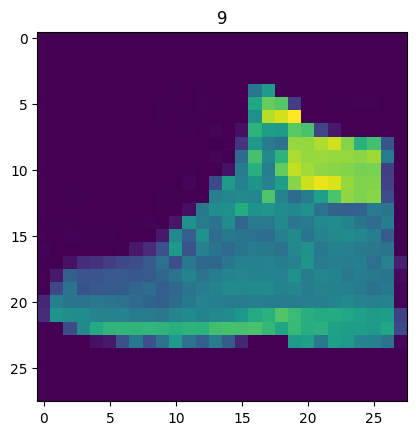

In [10]:
import matplotlib.pyplot as plt
image , label = train_data[90]
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

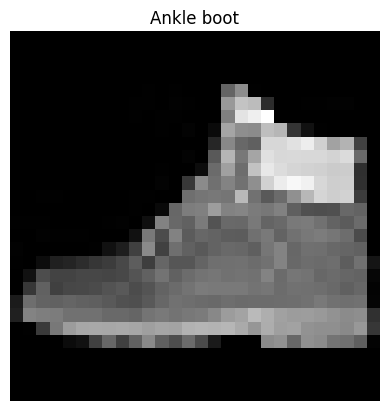

In [11]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)

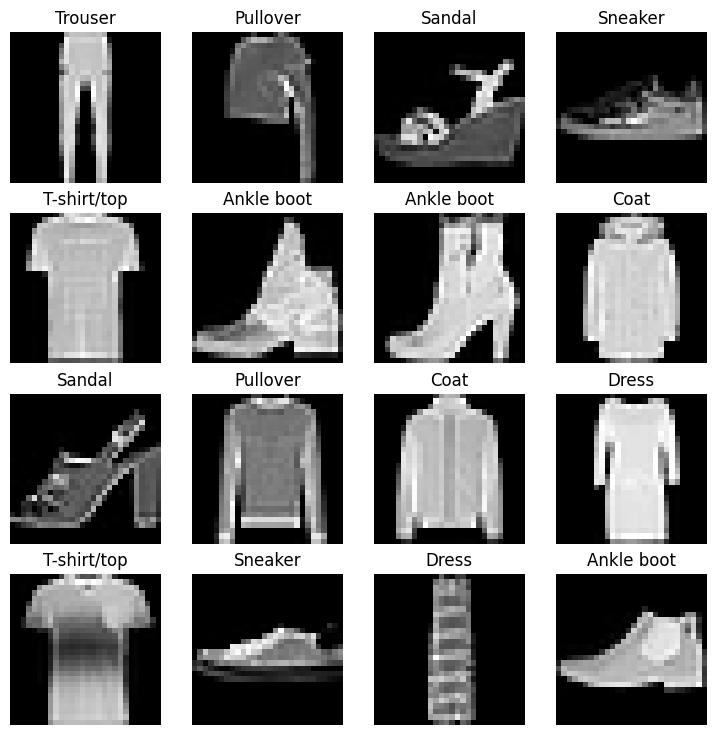

In [12]:
# torch.manual_seed(73)
fig = plt.figure(figsize=(9 , 9))
rows , cols = 4 , 4

for i in range(1 , rows*cols+1):
  idx = torch.randint(0 , len(train_data) , size=[1]).item()
  img , lbl = train_data[idx]
  fig.add_subplot(rows , cols , i)
  plt.imshow(img.squeeze() , cmap='gray')
  plt.title(train_data.classes[lbl])
  plt.axis(False)

**Preparing the Data Loader**

DataLoader turns our dataset (of Pytorch format) into Python iterable.

Specifically, turning our data into batches/mini-batches to stay computationally efficient with hardware memory and give our network more chances to update its gradients per training epoch.

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [14]:
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader : 1875 batches of 32


In [15]:
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of test_dataloader : 313 batches of 32


In [16]:
# Inside of train_dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

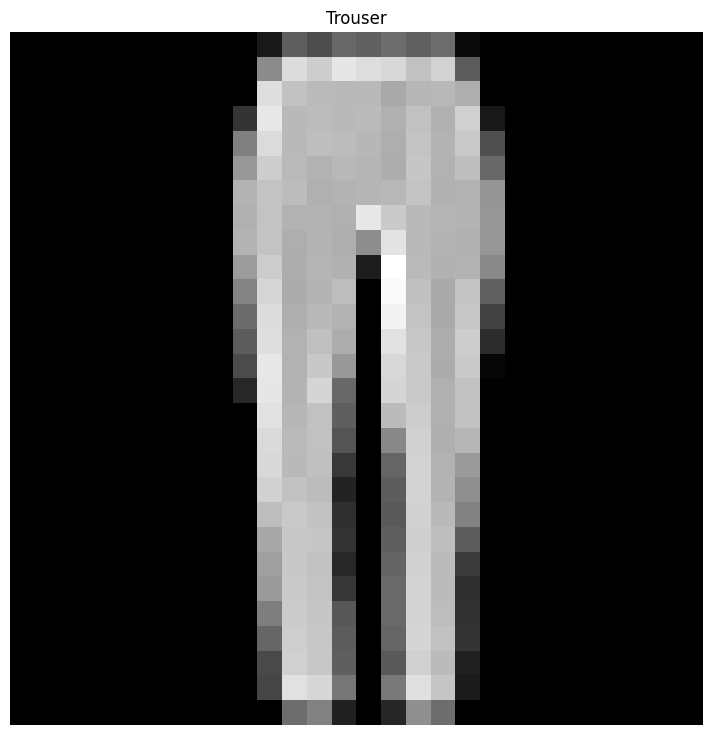

In [17]:
# Random sample of inside a batch of data
fig = plt.figure(figsize=(9 , 9))
rows , cols = 4 , 4

for i in range(1 , rows*cols+1):
  idx = torch.randint(0 , len(train_features_batch) , size=[1]).item()
  img , lbl = train_features_batch[idx] , train_labels_batch[idx]
  plt.imshow(img.squeeze() , cmap='gray')
  plt.title(train_data.classes[lbl])
  plt.axis(False)

**Creating a Baseline Image Model**

In [20]:
# Creating a flatten layer

flatten_model  = nn.Flatten()

# Getting a single sample
x = train_features_batch[0]
x.shape

# Flattening the sample
output = flatten_model(x) # performs a forward pass
output.shape

# Flatten is used to condense the data into single vector space. It is done because we will be using linear model as a base model.

torch.Size([1, 784])

In [22]:
class FashionMNISTModel(nn.Module):

  def __init__(self , input_shape: int , hidden_units:int , output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape , out_features=hidden_units),
        nn.Linear(in_features=hidden_units , out_features=output_shape),
    )

  def forward(self , X):
    return self.layer_stack(X)


In [28]:
modelv0 = FashionMNISTModel(input_shape=784, # this is 28*28
                           hidden_units=8,
                            output_shape = len(train_data.classes)
                            )

modelv0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [29]:
dummy_x = torch.rand([1 , 1 , 28 , 28])

modelv0(dummy_x) # returns logits

tensor([[ 0.4498, -0.0748,  0.2017, -0.2956,  0.1372,  0.0538,  0.1363, -0.2068,
         -0.1210,  0.3001]], grad_fn=<AddmmBackward0>)

**Traning our Model**

In [35]:
# Loss functions and Optimizers

loss_fn = nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(params=modelv0.parameters() , lr=0.1)

In [43]:
# Importing custom evaluation metrics

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("we are all set")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

we are all set


In [45]:
# Creating a function to time the experiments
from timeit import default_timer as timer
def train_time(start:float,end:float,device:torch.device = None):
  """ Prints difference between start and end time. """
  total_time = end - start
  return total_time